In [50]:
# PACKAGE IMPORT
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


At first, we import the cleaned data.

In [51]:
# CLEANED DATA LOADING
data = pd.read_csv("data/allcolumns_80.csv")

In [52]:
data

,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


## CONFOUNDERS IDENTIFICATION

In order to identify confounders, we need to remove the diet variables from the data.

In [53]:
non_diet_var = ['V1',
 'V2',
 'V3',
 'V6',
 'V8',
 'V10',
 'V11',
 'V12',
 'V13',
 'V17',
 'V18',
 'V19',
 'V20',
 'FUM2',
 'FUM3',
 'FUM5',
 'FUM7',
 'FUM8',
 'FUM12',
 'FUM15',
 'ANTR2',
 'ANTR4',
 'ANTR6',
 'ANTR12',
 'PORP4',
 'ALC4',
 'ALC8',
 'ALC12',
 'ALC16',
 'ALC20',
 'ALC25',
 'ANAM1',
 'ANAM2',
 'ANAM3',
 'ANAM4',
 'ANAM5',
 'ANAM6',
 'ANAM7',
 'ANAM8',
 'ANAM9',
 'ANAM11',
 'ANAM12',
 'ANAM13',
 'ANAM14',
 'ANAM15',
 'ANAM16',
 'ANAM17',
 'ANAM18',
 'ANAM19',
 'ANAM20',
 'ANAM21',
 'ANAM22',
 'ANAM24',
 'ANAM25',
 'ANAM26',
 'ANAM27',
 'FAM1',
 'FAM2',
 'FAM9',
 'FAM15',
 'GIN1',
 'GIN2',
 'GIN8',
 'GIN9',
 'GIN12',
 'GIN13',
 'GIN14',
 'GIN15',
 'GIN16',
 'GIN18',
 'GIN26',
 'GIN27',

 'FARM2',
 'FARM4',
 'FARM6',
 'FARM10',
 'FARM12',
 'FARM14',
 'FARM16',
 'FARM17',
 'FARM18',
 'FARM24',
 'CENTRO_1',
 'CENTRO_2',
 'CENTRO_4',
 'CENTRO_5',
 'CENTRO_6',
 'CENTRO_7',
 'V4_1',
 'V5_1',
 'V5_2',
 'V5_3',
 'V5_4',
 'V5_5',
 'V5_6',
 'V5_7',
 'V5_8',
 'V5_9',
 'V5_10',
 'V5_11',
 'V5_12',
 'V5_13',
 'V5_15',
 'V9_1',
 'V9_2',
 'V9_3',
 'V9_4',
 'V9_5',
 'V14_1',
 'V14_2',
 'V14_3',
 'V14_4',
 'V14_5',
 'V14_6',
 'V14_7',
 'V14_8',
 'V14_9',
 'V14_30',
 'V15_1',
 'V15_2',
 'V15_3',
 'V15_4',
 'V15_5',
 'V15_6',
 'V15_7',
 'V15_8',
 'V15_9',
 'FUM10_1',
 'FUM10_2',
 'FUM10_3',
 'FUM13_1',
 'FUM13_2',
 'FUM13_3',
 'FUM13_52',
 'FUM16_1',
 'FUM16_2',
 'FUM16_3',
 'FUM17_1',
 'FUM17_2',
 'FUM17_3',
 'FAM3_1',
 'FAM3_2',
 'FAM3_3',
 'FAM3_4',
 'FAM3_5',
 'FAM3_6',
 'FAM3_7',
 'FAM3_8',
 'FAM3_9',
 'FAM4_1',
 'FAM6_155',
 'FAM6_179',
 'FAM6_185',
 'FAM6_1409',
 'FAM6_1410',
 'FAM6_1419',
 'FAM6_1420',
 'FAM6_1429',
 'FAM6_1449',
 'FAM6_1459',
 'FAM6_1460',
 'FAM6_1469',
 'FAM6_1479',
 'FAM6_1489',
 'FAM6_1490',
 'FAM6_1499',
 'FAM6_1500',
 'FAM6_1509',
 'FAM6_1510',
 'FAM6_1519',
 'FAM6_1520',
 'FAM6_1529',
 'FAM6_1533',
 'FAM6_1538',
 'FAM6_1539',
 'FAM6_1541',
 'FAM6_1543',
 'FAM6_1548',
 'FAM6_1550',
 'FAM6_1552',
 'FAM6_1560',
 'FAM6_1561',
 'FAM6_1562',
 'FAM6_1569',
 'FAM6_1579',
 'FAM6_1589',
 'FAM6_1590',
 'FAM6_1591',
 'FAM6_1599',
 'FAM6_1610',
 'FAM6_1619',
 'FAM6_1620',
 'FAM6_1622',
 'FAM6_1629',
 'FAM6_1639',
 'FAM6_1641',
 'FAM6_1643',
 'FAM6_1649',
 'FAM6_1701',
 'FAM6_1702',
 'FAM6_1704',
 'FAM6_1708',
 'FAM6_1709',
 'FAM6_1710',
 'FAM6_1715',
 'FAM6_1717',
 'FAM6_1719',
 'FAM6_1723',
 'FAM6_1726',
 'FAM6_1727',
 'FAM6_1729',
 'FAM6_1733',
 'FAM6_1739',
 'FAM6_1740',
 'FAM6_1744',
 'FAM6_1749',
 'FAM6_1790',
 'FAM6_1799',
 'FAM6_1809',
 'FAM6_1820',
 'FAM6_1828',
 'FAM6_1830',
 'FAM6_1839',
 'FAM6_1840',
 'FAM6_1844',
 'FAM6_1850',
 'FAM6_1869',
 'FAM6_1877',
 'FAM6_1879',
 'FAM6_1889',
 'FAM6_1890',
 'FAM6_1899',
 'FAM6_1906',
 'FAM6_1909',
 'FAM6_1910',
 'FAM6_1916',
 'FAM6_1919',
 'FAM6_1922',
 'FAM6_1929',
 'FAM6_1930',
 'FAM6_1949',
 'FAM6_1950',
 'FAM6_1951',
 'FAM6_1952',
 'FAM6_1953',
 'FAM6_1954',
 'FAM6_1955',
 'FAM6_1963',
 'FAM6_1969',
 'FAM6_1970',
 'FAM6_1986',
 'FAM6_1990',
 'FAM6_1991',
 'FAM6_1999',
 'FAM6_2000',
 'FAM6_2001',
 'FAM6_2008',
 'FAM6_2019',
 'FAM6_2021',
 'FAM6_2028',
 'FAM6_2029',
 'FAM6_2030',
 'FAM6_2040',
 'FAM6_2049',
 'FAM6_2059',
 'FAM6_2080',
 'FAM6_2089',
 'FAM6_2199',
 'FAM6_2389',
 'FAM6_2392',
 'FAM6_2396',
 'FAM6_2399',
 'FAM8_1',
 'FAM8_2',
 'FAM8_3',
 'FAM8_4',
 'FAM8_5',
 'FAM8_6',
 'FAM8_7',
 'FAM8_8',
 'FAM8_9',
 'FAM11_155',
 'FAM11_179',
 'FAM11_185',
 'FAM11_1409',
 'FAM11_1419',
 'FAM11_1459',
 'FAM11_1490',
 'FAM11_1499',
 'FAM11_1509',
 'FAM11_1511',
 'FAM11_1519',
 'FAM11_1529',
 'FAM11_1533',
 'FAM11_1539',
 'FAM11_1541',
 'FAM11_1550',
 'FAM11_1552',
 'FAM11_1560',
 'FAM11_1561',
 'FAM11_1579',
 'FAM11_1590',
 'FAM11_1599',
 'FAM11_1600',
 'FAM11_1610',
 'FAM11_1618',
 'FAM11_1619',
 'FAM11_1629',
 'FAM11_1649',
 'FAM11_1650',
 'FAM11_1691',
 'FAM11_1709',
 'FAM11_1719',
 'FAM11_1729',
 'FAM11_1730',
 'FAM11_1735',
 'FAM11_1736',
 'FAM11_1739',
 'FAM11_1749',
 'FAM11_1790',
 'FAM11_1799',
 'FAM11_1809',
 'FAM11_1820',
 'FAM11_1828',
 'FAM11_1830',
 'FAM11_1840',
 'FAM11_1844',
 'FAM11_1850',
 'FAM11_1860',
 'FAM11_1869',
 'FAM11_1889',
 'FAM11_1890',
 'FAM11_1899',
 'FAM11_1910',
 'FAM11_1919',
 'FAM11_1929',
 'FAM11_1930',
 'FAM11_1950',
 'FAM11_1954',
 'FAM11_1986',
 'FAM11_1990',
 'FAM11_1991',
 'FAM11_1999',
 'FAM11_2001',
 'FAM11_2008',
 'FAM11_2019',
 'FAM11_2020',
 'FAM11_2021',
 'FAM11_2028',
 'FAM11_2029',
 'FAM11_2049',
 'FAM11_2080',
 'FAM11_2089',
 'FAM13_1',
 'FAM13_2',
 'FAM13_3',
 'FAM13_4',
 'FAM13_5',
 'FAM13_6',
 'FAM13_8',
 'FAM13_9',
 'FAM14_1',
 'FAM14_2',
 'FAM16_155',
 'FAM16_1459',
 'FAM16_1469',
 'FAM16_1490',
 'FAM16_1499',
 'FAM16_1509',
 'FAM16_1515',
 'FAM16_1519',
 'FAM16_1539',
 'FAM16_1541',
 'FAM16_1550',
 'FAM16_1552',
 'FAM16_1579',
 'FAM16_1590',
 'FAM16_1591',
 'FAM16_1599',
 'FAM16_1619',
 'FAM16_1622',
 'FAM16_1629',
 'FAM16_1649',
 'FAM16_1701',
 'FAM16_1709',
 'FAM16_1729',
 'FAM16_1739',
 'FAM16_1749',
 'FAM16_1790',
 'FAM16_1809',
 'FAM16_1820',
 'FAM16_1830',
 'FAM16_1850',
 'FAM16_1889',
 'FAM16_1890',
 'FAM16_1899',
 'FAM16_1910',
 'FAM16_1919',
 'FAM16_1951',
 'FAM16_1990',
 'FAM16_1991',
 'FAM16_2019',
 'FAM16_2029',
 'FAM16_2080',
 'FAM16_2089',
 'FAM18_1',
 'FAM18_2',
 'FAM18_3',
 'FAM18_4',
 'FAM18_6',
 'FAM18_9',
 'FAM19_1',
 'FAM21_1469',
 'FAM21_1499',
 'FAM21_1509',
 'FAM21_1519',
 'FAM21_1552',
 'FAM21_1590',
 'FAM21_1610',
 'FAM21_1619',
 'FAM21_1629',
 'FAM21_1709',
 'FAM21_1749',
 'FAM21_1790',
 'FAM21_1850',
 'FAM21_1889',
 'FAM21_1890',
 'FAM21_1910',
 'FAM21_1919',
 'FAM21_2029',
 'FAM21_2089',
 'FAM23_0',
 'FAM23_3',
 'FAM23_5',
 'FAM23_6',
 'FAM26_1519',
 'FAM26_1729',
 'FAM26_1749',
 'FAM26_1991',
 'FAM28_5',
 'GIN3_1',
 'GIN3_2',
 'GIN3_3',
 'GIN3_4',
 'GIN3_5',
 'GIN3_6',
 'GIN3_8',
 'GIN4_1',
 'GIN4_2',
 'GIN4_3',
 'GIN6_1',
 'GIN6_2',
 'GIN6_3',
 'GIN6_4',
 'GIN11_1',
 'GIN11_2',
 'GIN11_3',
 'GIN11_4',
 'GIN19_0',
 'GIN19_1',
 'GIN19_2',
 'GIN19_3',
 'GIN19_4',
 'GIN19_5',
 'GIN19_6',
 'GIN19_7',
 'GIN19_8',
 'GIN20_0',
 'GIN20_1',
 'GIN20_2',
 'GIN20_3',
 'GIN20_4',
 'GIN20_5',
 'GIN20_6',
 'GIN20_7',
 'GIN20_8',
 'GIN21_0',
 'GIN21_1',
 'GIN21_2',
 'GIN21_3',
 'GIN21_4',
 'GIN21_5',
 'GIN21_6',
 'GIN21_7',
 'GIN21_8',
 'GIN22_0',
 'GIN22_1',
 'GIN22_2',
 'GIN22_3',
 'GIN22_4',
 'GIN22_5',
 'GIN22_6',
 'GIN22_7',
 'GIN22_8',
 'GIN23_0',
 'GIN23_1',
 'GIN23_2',
 'GIN23_3',
 'GIN23_4',
 'GIN23_5',
 'GIN23_6',
 'GIN23_8',
 'GIN24_0',
 'GIN24_1',
 'GIN24_2',
 'GIN24_3',
 'GIN24_4',
 'GIN24_5',
 'GIN24_6',
 'GIN24_8',
 'GIN25_0',
 'GIN25_1',
 'GIN25_2',
 'GIN25_3',
 'GIN25_4',
 'GIN25_6',
 'GIN25_8',
 'GIN28_1',
 'GIN28_2',
 'GIN28_3',
 'GIN28_4',
 'GIN28_8',
 'FARM3_1',
 'FARM3_2',
 'FARM3_3',
 'FARM3_4',
 'FARM3_5',
 'FARM3_6',
 'FARM3_7',
 'FARM3_8',
 'FARM3_9',
 'FARM7_0',
 'FARM7_1',
 'FARM7_2',
 'FARM7_3',
 'FARM7_4',
 'FARM7_5',
 'FARM7_6',
 'FARM7_7',
 'FARM7_8',
 'FARM11_1',
 'FARM11_2',
 'FARM11_3',
 'FARM11_4',
 'FARM11_5',
 'FARM11_6',
 'FARM11_7',
 'FARM11_8',
 'FARM15_0',
 'FARM15_1',
 'FARM15_2',
 'FARM15_3',
 'FARM15_5',
 'FARM15_8',
 'FARM19_1',
 'FARM19_3',
 'FARM19_5',
 'FARM19_8',
 'FARM23_2',
 'FARM23_5',
 'V23_1',
 'V23_2',
 'V23_3',
 'V23_4',
 'ALC_TOTAL',
 'FUM_TYPE1_YEARS',
 'PRE_BMI',
 'WHR',
 'AVG_USUAL_WEIGHT']

In [75]:
# REMOVING DIET VARIABLES
diet_vars = [
    # Fats
    'COND1', 'COND2', 'COND3', 'COND4', 'COND5', 'COND6', 'COND7', 'COND8', 'COND9', 'COND10',
    'COND11', 'COND12', 'COND13', 'COND14', 'COND15', 'COND16', 'COND17',

    # Transversal Alimentary Habits
    'PASTI1', 'PASTI2',

    # Milk
    'ALI1', 'ALI2', 'ALI3', 'ALI4', 'ALI5',

    # Meat, eggs, salumi
    'ALI26', 'ALI27', 'ALI28', 'ALI29', 'ALI30', 'ALI31', 'ALI32', 'ALI33',
    'ALI34', 'ALI35', 'ALI36', 'ALI37', 'ALI38',

    # Fish
    'ALI39', 'ALI40', 'ALI41',

    # Vegetables
    'ALI45', 'ALI46', 'ALI47', 'ALI48', 'ALI49', 'ALI50', 'ALI51',
    'ALI54', 'ALI55', 'ALI56', 'ALI57',

    # Fruits
    'ALI58', 'ALI59', 'ALI60', 'ALI61', 'ALI62', 'ALI63', 'ALI64', 'ALI65',
    'ALI66', 'ALI67', 'ALI68', 'ALI69',

    # Sweets and Beverages
    'ALI70', 'ALI71', 'ALI72', 'ALI73', 'ALI74', 'ALI75', 'ALI76', 'ALI77', 'ALI78'
]


#cleaned_vars_raw = """V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,V18,V19,V20,FUM2,FUM3,FUM5,FUM7,FUM8,FUM12,FUM15,ANTR2,ANTR4,ANTR6,ANTR12,PORP4,ALC4,ALC8,ALC12,ALC16,ALC20,ALC25,ANAM1,ANAM2,ANAM3,ANAM4,ANAM5,ANAM6,ANAM7,ANAM8,ANAM9,ICDAN10,ANAM11,ANAM12,ANAM13,ANAM14,ANAM15,ANAM16,ANAM17,ANAM18,ANAM19,ANAM20,ANAM21,ANAM22,ANAM23,ANAM24,ANAM25,ANAM26,ANAM27,FAM1,FAM2,FAM9,FAM10,FAM15,FAM22,FAM30,GIN1,GIN2,GIN8,GIN9,GIN10,GIN13,GIN14,GIN15,GIN18,GIN26,GIN27,FARM1,FARM2,FARM4,FARM6,FARM8,FARM10,FARM12,FARM14,FARM17,FARM18,FARM24,NUT13,NUT21,NUT26,NUT28,NUT29,NUT31,NUT36,NUT42,NUT43,NUT45,NUT47,NUT48,NUT49,NUT52,CENTRO_1,CENTRO_2,CENTRO_3,CENTRO_4,CENTRO_5,CENTRO_6,CENTRO_7,V4_1,V5_1,V5_2,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9,V5_10,V5_11,V5_12,V5_13,V5_15,V9_1,V9_2,V9_3,V9_4,V9_5,V14_1,V14_2,V14_3,V14_4,V14_5,V14_6,V14_7,V14_8,V14_9,V14_30,V15_1,V15_2,V15_3,V15_4,V15_5,V15_6,V15_7,V15_8,V15_9,FUM10_1,FUM10_2,FUM10_3,FUM13_1,FUM13_2,FUM13_3,FUM13_7,FUM13_52,FUM16_1,FUM16_2,FUM16_3,FUM17_1,FUM17_2,FUM17_3,FAM3_0,FAM3_1,FAM3_2,FAM3_3,FAM3_4,FAM3_5,FAM3_6,FAM3_7,FAM3_8,FAM3_9,FAM4_1,FAM6_155,FAM6_179,FAM6_185,FAM6_1409,FAM6_1410,FAM6_1419,FAM6_1420,FAM6_1429,FAM6_1449,FAM6_1459,FAM6_1460,FAM6_1469,FAM6_1479,FAM6_1489,FAM6_1490,FAM6_1499,FAM6_1500,FAM6_1509,FAM6_1510,FAM6_1519,FAM6_1520,FAM6_1529,FAM6_1533,FAM6_1538,FAM6_1539,FAM6_1541,FAM6_1543,FAM6_1548,FAM6_1550,FAM6_1552,FAM6_1560,FAM6_1561,FAM6_1562,FAM6_1569,FAM6_1579,FAM6_1589,FAM6_1590,FAM6_1591,FAM6_1599,FAM6_1610,FAM6_1619,FAM6_1620,FAM6_1622,FAM6_1629,FAM6_1639,FAM6_1641,FAM6_1643,FAM6_1649,FAM6_1701,FAM6_1702,FAM6_1704,FAM6_1708,FAM6_1709,FAM6_1710,FAM6_1715,FAM6_1717,FAM6_1719,FAM6_1723,FAM6_1726,FAM6_1727,FAM6_1729,FAM6_1733,FAM6_1739,FAM6_1740,FAM6_1744,FAM6_1749,FAM6_1790,FAM6_1799,FAM6_1809,FAM6_1820,FAM6_1828,FAM6_1830,FAM6_1839,FAM6_1840,FAM6_1844,FAM6_1850,FAM6_1869,FAM6_1877,FAM6_1879,FAM6_1889,FAM6_1890,FAM6_1899,FAM6_1906,FAM6_1909,FAM6_1910,FAM6_1916,FAM6_1919,FAM6_1922,FAM6_1929,FAM6_1930,FAM6_1949,FAM6_1950,FAM6_1951,FAM6_1952,FAM6_1953,FAM6_1954,FAM6_1955,FAM6_1963,FAM6_1969,FAM6_1970,FAM6_1986,FAM6_1990,FAM6_1991,FAM6_1999,FAM6_2000,FAM6_2001,FAM6_2008,FAM6_2019,FAM6_2021,FAM6_2028,FAM6_2029,FAM6_2030,FAM6_2040,FAM6_2049,FAM6_2059,FAM6_2080,FAM6_2089,FAM6_2199,FAM6_2389,FAM6_2392,FAM6_2396,FAM6_2399,FAM8_1,FAM8_2,FAM8_3,FAM8_4,FAM8_5,FAM8_6,FAM8_7,FAM8_8,FAM8_9,FAM11_155,FAM11_179,FAM11_185,FAM11_1409,FAM11_1419,FAM11_1459,FAM11_1490,FAM11_1499,FAM11_1509,FAM11_1511,FAM11_1519,FAM11_1529,FAM11_1533,FAM11_1539,FAM11_1541,FAM11_1550,FAM11_1552,FAM11_1560,FAM11_1561,FAM11_1579,FAM11_1590,FAM11_1599,FAM11_1600,FAM11_1610,FAM11_1618,FAM11_1619,FAM11_1629,FAM11_1649,FAM11_1650,FAM11_1691,FAM11_1709,FAM11_1719,FAM11_1729,FAM11_1730,FAM11_1735,FAM11_1736,FAM11_1739,FAM11_1749,FAM11_1790,FAM11_1799,FAM11_1809,FAM11_1820,FAM11_1828,FAM11_1830,FAM11_1840,FAM11_1844,FAM11_1850,FAM11_1860,FAM11_1869,FAM11_1889,FAM11_1890,FAM11_1899,FAM11_1910,FAM11_1919,FAM11_1929,FAM11_1930,FAM11_1950,FAM11_1954,FAM11_1986,FAM11_1990,FAM11_1991,FAM11_1999,FAM11_2001,FAM11_2008,FAM11_2019,FAM11_2020,FAM11_2021,FAM11_2028,FAM11_2029,FAM11_2049,FAM11_2080,FAM11_2089,FAM13_1,FAM13_2,FAM13_3,FAM13_4,FAM13_5,FAM13_6,FAM13_8,FAM13_9,FAM14_1,FAM16_155,FAM16_1459,FAM16_1469,FAM16_1490,FAM16_1499,FAM16_1509,FAM16_1515,FAM16_1519,FAM16_1539,FAM16_1541,FAM16_1550,FAM16_1552,FAM16_1579,FAM16_1590,FAM16_1591,FAM16_1599,FAM16_1619,FAM16_1622,FAM16_1629,FAM16_1649,FAM16_1701,FAM16_1709,FAM16_1729,FAM16_1739,FAM16_1749,FAM16_1790,FAM16_1809,FAM16_1820,FAM16_1830,FAM16_1850,FAM16_1889,FAM16_1890,FAM16_1899,FAM16_1910,FAM16_1919,FAM16_1951,FAM16_1990,FAM16_1991,FAM16_2019,FAM16_2029,FAM16_2080,FAM16_2089,FAM18_1,FAM18_2,FAM18_3,FAM18_4,FAM18_6,FAM18_9,FAM19_1,FAM21_1469,FAM21_1499,FAM21_1509,FAM21_1519,FAM21_1552,FAM21_1590,FAM21_1610,FAM21_1619,FAM21_1629,FAM21_1709,FAM21_1749,FAM21_1790,FAM21_1850,FAM21_1889,FAM21_1890,FAM21_1910,FAM21_1919,FAM21_2029,FAM21_2089,FAM23_0,FAM23_3,FAM23_5,FAM23_6,FAM26_1519,FAM26_1729,FAM26_1749,FAM26_1991,FAM28_5,GIN3_1,GIN3_2,GIN3_3,GIN3_4,GIN3_5,GIN3_6,GIN3_8,GIN4_1,GIN4_2,GIN6_1,GIN6_3,GIN6_4,GIN11_1,GIN11_2,GIN11_3,GIN11_4,GIN19_0,GIN19_1,GIN19_2,GIN19_3,GIN19_4,GIN19_5,GIN19_6,GIN19_7,GIN19_8,GIN20_0,GIN20_1,GIN20_2,GIN20_3,GIN20_4,GIN20_5,GIN20_6,GIN20_7,GIN20_8,GIN21_1,GIN21_2,GIN21_3,GIN21_4,GIN21_5,GIN21_6,GIN21_7,GIN21_8,GIN22_1,GIN22_2,GIN22_3,GIN22_4,GIN22_5,GIN22_6,GIN22_7,GIN22_8,GIN23_0,GIN23_1,GIN23_2,GIN23_3,GIN23_4,GIN23_5,GIN23_6,GIN23_8,GIN24_0,GIN24_1,GIN24_2,GIN24_3,GIN24_4,GIN24_5,GIN24_6,GIN24_8,GIN25_1,GIN25_2,GIN25_3,GIN25_4,GIN25_6,GIN25_8,GIN28_1,GIN28_2,GIN28_3,GIN28_4,GIN28_8,FARM3_1,FARM3_2,FARM3_3,FARM3_4,FARM3_5,FARM3_6,FARM3_7,FARM3_8,FARM3_9,FARM7_0,FARM7_1,FARM7_2,FARM7_3,FARM7_4,FARM7_5,FARM7_6,FARM7_7,FARM7_8,FARM11_1,FARM11_2,FARM11_3,FARM11_4,FARM11_5,FARM11_6,FARM11_7,FARM11_8,FARM15_0,FARM15_1,FARM15_2,FARM15_3,FARM15_5,FARM15_8,FARM19_1,FARM19_3,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,PRE_BMI,WHR,AVG_USUAL_WEIGHT"""

In [55]:
cleaned_vars = list(data.columns)
diet_expanded = set()

for var in diet_vars:
    diet_expanded.add(var)
    diet_expanded.update({v for v in cleaned_vars if v.startswith(var + "_")})

# List of all diet variables based on cleaned data
adjusted_diet_vars = sorted(list(diet_expanded))
adjusted_diet_vars = [col.upper() for col in adjusted_diet_vars]

### Selection of Non-Diet Variables

This is the list of all diet variables in the data:

We now remove all diet-related variables from the dataset.

In [56]:
# CREATE A DATAFRAME WITH ALL VARIABLES EXCEPT DIET-RELATED
existing_cols = [col for col in non_diet_var if col in data.columns]
non_diet_data = data.drop(columns=diet_vars).copy()
non_diet_data


,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


### Dealing with Missing Values

We checked for missing values in the data and decided how to handle them.

This preprocessing step is implemented now because we want to adapt data usage to the LASSO model.

In [57]:
null_counts = non_diet_data.isnull().sum()
null_counts_sorted = null_counts.sort_values(ascending=False)
columns_with_nulls = null_counts[null_counts > 0].sort_values(ascending=False)
columns_with_nulls

FAM9      4467
FARM4      932
WHR        568
ANTR4      565
ALI25      232
          ... 
ANAM12       1
ANAM14       1
ANAM18       1
ANAM27       1
ANAM7        1
Length: 100, dtype: int64


We decided to drop the variable `FAM9` and `FARM4` because they have too many missing values.

The others will be imputed using the median.

In [58]:
non_diet_data.drop(columns=['FAM9', 'FARM4'])

,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


Missing value for diet variables for LCA 

In [59]:
diet_data= data[diet_vars].copy()

- Dropped **PASTI2** due to excessive missing values.  
- For **PASTI1** and the **ALI\*** variables, replaced special codes (`9`, `98`, `99`) with `NaN` and applied median imputation, resulting in a fully populated dataset.

In [60]:
# Drop PASTI2
diet_data = diet_data.drop(columns='PASTI2')

# Handle PASTI1: 1–8 valid, 9 → missing → imputa con mediana
diet_data['PASTI1'] = (
    diet_data['PASTI1']
      .replace(9, np.nan)
      .fillna(diet_data['PASTI1'].median())
)
#Handle ALI* variables (0–97 valid; 98=occasional, 99=missing →  mediana)
ali_vars = [
    'ALI68','ALI67','ALI64','ALI62','ALI61','ALI60','ALI59',
    'ALI58','ALI63','ALI65','ALI66','ALI69','ALI56','ALI38','ALI1'
]

# replace 98 and 99 with NaN
diet_data[ali_vars] = diet_data[ali_vars].replace({98: np.nan, 99: np.nan})

# median imputation per column
for col in ali_vars:
    diet_data[col] = diet_data[col].fillna(diet_data[col].median())

In [61]:
diet_data

,COND1_1,COND1_2,COND1_3,COND1_4,COND1_5,COND1_6,COND1_7,COND2_1,COND2_2,COND2_3,...,ALI69,ALI70,ALI71,ALI72,ALI73,ALI74,ALI75,ALI76,ALI77,ALI78
0,False,False,True,False,False,False,False,False,False,False,...,2.0,98.0,4.0,98.0,1.0,0.0,0.0,14.0,7.0,4.0
1,False,False,False,False,True,False,False,False,False,False,...,1.0,0.0,0.0,0.0,98.0,98.0,0.0,0.0,0.0,98.0
2,False,True,False,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,False,False,True,False,False,False,False,False,False,False,...,1.0,0.0,7.0,0.0,1.0,1.0,28.0,70.0,28.0,2.0
4,False,True,False,False,False,False,False,False,False,False,...,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,False,False,True,False,False,False,False,False,False,False,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
5153,False,True,False,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,2.0
5154,False,False,True,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0
5155,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


Check if there are missing values left

In [62]:
null_counts_d = diet_data.isnull().sum()
null_counts_sorted_d = null_counts_d.sort_values(ascending=False)
columns_with_nulls_d = null_counts_d[null_counts_d > 0].sort_values(ascending=False)
columns_with_nulls_d

Series([], dtype: int64)

### Model Training

Then, we used the `sklearn` library to implement a pipeline for the LASSO model. The process takes place in the following steps:

- **Imputation**: The missing values are imputed using the median.
- **Scaling**: The features are scaled using StandardScaler.
- **LASSO**: The LASSO model is trained using the scaled and imputed data.

The model is trained using 5-fold cross-validation and the accuracy is used as the evaluation metric.

In [63]:
# X = all non-diet variables
X = non_diet_data.drop(columns=['V2'])

# y = dependent variable (1 = case, 0 = control)
y = non_diet_data['V2']

# Pipeline: imputation + scaling + LASSO (wit 5-fold CV)
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lasso", LogisticRegressionCV(
        penalty="l1",
        solver="saga",
        cv=5,
        max_iter=5000,
        scoring='accuracy',
        refit=True
    ))
])

# Fit
pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1',
                                      scoring='accuracy', solver='saga'))])

### Analysis of Results

In [64]:
# Array of coefficients
lasso_model = pipeline.named_steps['lasso']
coefficients = lasso_model.coef_.ravel()

In [65]:
# Associate columns names with coefficients values
lasso_results = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value
lasso_results['AbsCoeff'] = lasso_results['Coefficient'].abs()
lasso_results_sorted = lasso_results.sort_values(by='AbsCoeff', ascending=False)
lasso_results_sorted

,Variable,Coefficient,AbsCoeff
215,V5_10,1.913790,1.913790
209,V5_4,-1.704094,1.704094
217,V5_12,-1.454469,1.454469
212,V5_7,-1.258412,1.258412
218,V5_13,1.099372,1.099372
...,...,...,...
345,PORZ30_3,0.000000,0.000000
346,PORZ31_1,0.000000,0.000000
347,PORZ31_2,0.000000,0.000000
348,PORZ31_3,0.000000,0.000000


In [66]:
# List of confounders to keep for the analysis
selected_confounders = lasso_results[lasso_results['AbsCoeff'] >= 0.04]
selected_confounders

,Variable,Coefficient,AbsCoeff
3,V8,0.060163,0.060163
5,V11,-0.084667,0.084667
6,V12,0.083525,0.083525
7,V13,0.081801,0.081801
8,V17,-0.057819,0.057819
...,...,...,...
764,GIN6_1,0.043017,0.043017
780,GIN19_8,-0.093151,0.093151
867,V23_1,0.084724,0.084724
870,V23_4,-0.041192,0.041192


In [67]:
selected_confounders.describe()

,Coefficient,AbsCoeff
count,65.000000,65.000000
mean,-0.024238,0.232505
std,0.462312,0.399281
min,-1.704094,0.040967
25%,-0.084061,0.054257
50%,-0.048149,0.082119
75%,0.068253,0.112871
max,1.913790,1.913790


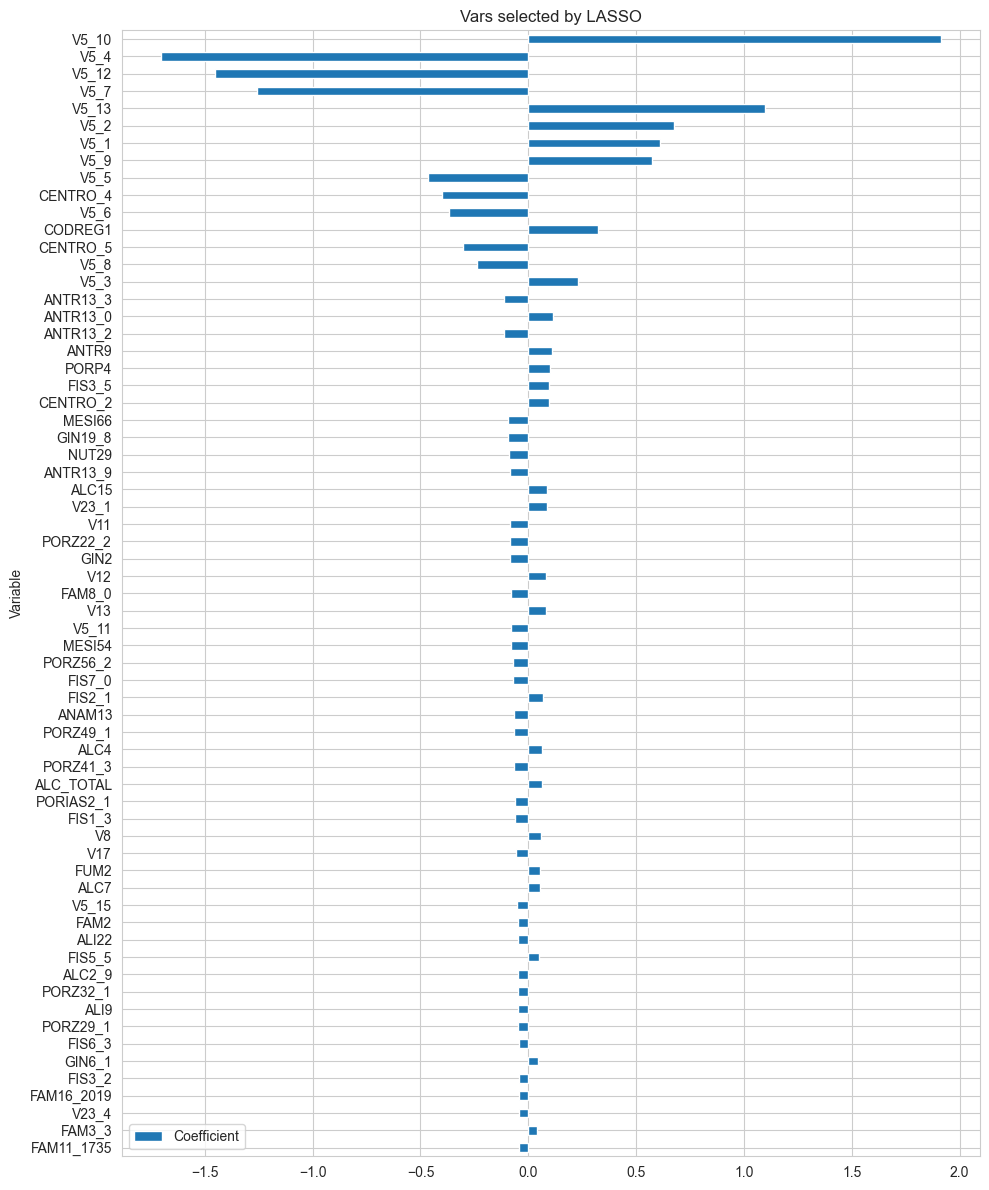

In [68]:
selected_confounders.sort_values('AbsCoeff', ascending=True).plot(
    x='Variable', y='Coefficient', kind='barh', figsize=(10, 12))
plt.title("Vars selected by LASSO")
plt.tight_layout()
plt.show()


In [71]:
selected_confounders

,Variable,Coefficient,AbsCoeff
3,V8,0.060163,0.060163
5,V11,-0.084667,0.084667
6,V12,0.083525,0.083525
7,V13,0.081801,0.081801
8,V17,-0.057819,0.057819
...,...,...,...
764,GIN6_1,0.043017,0.043017
780,GIN19_8,-0.093151,0.093151
867,V23_1,0.084724,0.084724
870,V23_4,-0.041192,0.041192


In [72]:
confounders_data = data[selected_confounders['Variable']]
confounders_data

,V8,V11,V12,V13,V17,FUM2,ANTR9,ALI9,ALI22,MESI54,...,ALC2_9,FAM3_3,FAM8_0,FAM11_1735,FAM16_2019,GIN6_1,GIN19_8,V23_1,V23_4,ALC_TOTAL
0,57,2,5.0,5.0,491.0,0.0,52,54.0,NaN,12.0,...,False,True,False,False,False,True,False,False,False,1010.0
1,70,2,3.0,3.0,392.0,0.0,66,14.0,0.0,6.0,...,False,False,True,False,False,True,False,False,False,7.0
2,61,1,6.0,6.0,391.0,0.0,48,42.0,NaN,12.0,...,False,False,True,False,False,False,False,False,False,21.0
3,48,2,4.0,5.0,492.0,0.0,47,88.0,0.0,12.0,...,False,False,True,False,False,False,False,False,False,16.0
4,51,2,10.0,13.0,891.0,0.0,50,40.0,1.0,12.0,...,False,False,True,False,False,False,False,False,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,74,3,5.0,5.0,294.0,0.0,73,14.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,7.0
5153,69,5,7.0,7.0,194.0,0.0,69,80.0,1.0,6.0,...,False,False,False,False,False,True,False,False,False,1005.0
5154,70,1,5.0,NaN,294.0,NaN,30,7.0,0.0,6.0,...,False,False,True,False,False,True,False,False,False,7.0
5155,71,2,7.0,5.0,194.0,0.0,52,0.0,0.0,6.0,...,False,False,True,False,False,True,False,False,False,7.0


## IDENTIFY DIET AS OVERALL EXPOSURE

### Variables Included in the Analysis

The following variables were selected to globally represent each participant's dietary pattern, taking into account weekly consumption habits, types of foods, and cooking practices.

#### Type of Fats and General Eating Habits
- `cond1–cond10`: Type of fat used for dressing salads, cooking vegetables and meat, and seasoning pasta or rice.
- `cond11–cond17`: Self-reported fat consumption, habits related to trimming fat from meats, salt addition, garlic use, and plate-leaving behaviors.
- `pasti2`: Number of main meals and snacks per day.

#### Milk and Dairy Products
- `ali1–ali5`: Weekly intake of milk (whole, skimmed), yogurt, cappuccino.

#### Meat, Processed Meats, and Eggs
- `ali26–ali38`: Weekly intake of eggs, poultry, red meat, and processed meats (e.g., ham, salami).

#### Fish
- `ali39–ali41`: Weekly intake of fish (boiled, fried, or canned).

#### Legumes and Vegetables
- `ali45–ali51`, `ali54–ali57`: Weekly intake of legumes and a variety of cooked and raw vegetables.

#### Fruit
- `ali58–ali69`: Weekly intake of fresh, seasonal, or canned fruit, along with fruit juices and jams.

#### Sweets and Sugary Beverages
- `ali70–ali78`: Weekly intake of biscuits, pastries, chocolate, candies, ice cream, and soft drinks.

---

All variables were chosen for their ability to reflect substantial differences in dietary behavior. Each variable will be recoded into categorical or ordinal variables (e.g., low/medium/high) to be suitable for the LCA modeling framework.


# LCA

SCRATCH

In [ ]:
from scipy.special import logsumexp

In [ ]:
class LatentClassAnalysis:
    # Initialize model with number of classes, variable types, EM settings
    def __init__(self, n_classes, var_types, max_iter=200, tol=1e-6, random_state=None):
        """
        var_types: list of 'bernoulli' or 'poisson' for each column of X
        """
        self.n_classes = n_classes
        self.var_types = var_types
        self.max_iter  = max_iter
        self.tol       = tol
        self.rng       = np.random.RandomState(random_state)

    # Randomly initialize class priors and per-class parameters (p or λ)
    def _initialize(self, X):
        n, d = X.shape
        self.pi = np.full(self.n_classes, 1/self.n_classes)
        self.params = np.zeros((self.n_classes, d))
        for j, t in enumerate(self.var_types):
            col = X[:, j]
            if t == 'bernoulli':
                m = col.mean()
                perturb = self.rng.normal(m, 0.1, size=self.n_classes)
                self.params[:, j] = np.clip(perturb, 1e-3, 1-1e-3)
            else:  # poisson
                m = col.mean()
                perturb = self.rng.normal(m, m*0.2 + 1e-3, size=self.n_classes)
                self.params[:, j] = np.clip(perturb, 1e-3, None)

    # E-step: compute responsibilities and log-likelihood
    def _e_step(self, X):
        n, d = X.shape
        log_resp = np.zeros((n, self.n_classes))
        for k in range(self.n_classes):
            lp = 0
            for j, t in enumerate(self.var_types):
                θ = self.params[k, j]
                xj = X[:, j]
                if t == 'bernoulli':
                    lp += xj * np.log(θ) + (1 - xj) * np.log(1 - θ)
                else:  # poisson log-lik up to constant
                    lp += xj * np.log(θ) - θ
            log_resp[:, k] = np.log(self.pi[k]) + lp

        log_norm = logsumexp(log_resp, axis=1, keepdims=True)
        resp     = np.exp(log_resp - log_norm)
        ll       = log_norm.sum()
        return resp, ll

    # M-step: update priors and per-class parameters using weighted sums
    def _m_step(self, X, resp):
        n, d = X.shape
        Nk = resp.sum(axis=0)
        self.pi = Nk / n
        for k in range(self.n_classes):
            for j, t in enumerate(self.var_types):
                weighted_sum = (resp[:, k] * X[:, j]).sum()
                if t == 'bernoulli':
                    self.params[k, j] = np.clip(weighted_sum / Nk[k], 1e-3, 1-1e-3)
                else:
                    self.params[k, j] = np.clip(weighted_sum / Nk[k], 1e-3, None)

    # Fit the LCA model to data X via EM until convergence or max_iter
    def fit(self, X):
        if hasattr(X, "values"):
            X = X.values
        X = X.astype(float)
        self._initialize(X)
        ll_old = None

        for _ in range(self.max_iter):
            resp, ll = self._e_step(X)
            self._m_step(X, resp)
            if ll_old is not None and abs(ll - ll_old) < self.tol:
                break
            ll_old = ll

        self.resp = resp
        self.ll   = ll
        return self

    # Compute Bayesian Information Criterion for model selection
    def bic(self, X):
        n, d = X.shape
        p   = (self.n_classes - 1) + self.n_classes * d
        return -2 * self.ll + p * np.log(n)

    # Compute posterior class probabilities for new data
    def predict_proba(self, X):
        if hasattr(X, "values"):
            X = X.values
        resp, _ = self._e_step(X.astype(float))
        return resp

    # Assign each sample to the class with highest posterior probability
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [ ]:
continuous_vars = ['PASTI1',
    'ALI1','ALI2','ALI3','ALI4','ALI5',
    'ALI26','ALI27','ALI28','ALI29','ALI30',
    'ALI31','ALI32','ALI33','ALI34','ALI35',
    'ALI36','ALI37','ALI38','ALI39','ALI40',
    'ALI41','ALI45','ALI46','ALI47','ALI48',
    'ALI49','ALI50','ALI51','ALI54','ALI55',
    'ALI56','ALI57','ALI58','ALI59','ALI60',
    'ALI61','ALI62','ALI63','ALI64','ALI65',
    'ALI66','ALI67','ALI68','ALI69','ALI70',
    'ALI71','ALI72','ALI73','ALI74','ALI75',
    'ALI76','ALI77','ALI78'
]

categorical_vars = [
    'COND1_1','COND1_2','COND1_3','COND1_4','COND1_5','COND1_6','COND1_7',
    'COND2_1','COND2_2','COND2_3','COND2_5','COND2_6','COND2_8',
    'COND3_1','COND3_2','COND3_3','COND3_4','COND3_5','COND3_6','COND3_7','COND3_8',
    'COND4_1','COND4_2','COND4_3','COND4_4','COND4_5','COND4_6','COND4_7','COND4_8',
    'COND5_1','COND5_2','COND5_3','COND5_4','COND5_5','COND5_6','COND5_7','COND5_8',
    'COND6_1','COND6_2','COND6_3','COND6_4','COND6_5','COND6_6','COND6_7','COND6_8',
    'COND7_1','COND7_2','COND7_3','COND7_4','COND7_5','COND7_6','COND7_7','COND7_8',
    'COND8_1','COND8_2','COND8_3','COND8_4','COND8_5','COND8_6','COND8_7','COND8_8',
    'COND9_1','COND9_2','COND9_3','COND9_4','COND9_5','COND9_6','COND9_7','COND9_8',
    'COND10_1','COND10_2','COND10_3','COND10_4','COND10_5','COND10_6','COND10_7','COND10_8',
    'COND11_2','COND11_3','COND12_2','COND12_3','COND13_2','COND13_3',
    'COND14_1','COND14_3','COND15_2','COND16_1','COND16_2','COND16_3',
    'COND17_2','COND17_3'
]


# ONE HOT ENCODING DELLE VARIABILI CONTINUE

**prima creo i bin con uguale distanza e tenenzo 0 (ovvero mai) in una categoria isolata per evitare i problemi di duplicates**

In [ ]:
for col in continuous_vars:
    s = diet_data[col]
    non_zero = s[s > 0]
    
    # se non ci sono consumi >0 o sono tutti uguali, faccio solo zero vs positive
    if non_zero.empty or non_zero.min() == non_zero.max():
        diet_data[f"{col}_cat"] = np.where(s > 0, 'positive', 'zero')
        continue
    
    # calcolo due soglie equamente distanziate fra min e max dei non-zero
    mn, mx = non_zero.min(), non_zero.max()
    thr1 = mn + (mx - mn)/3
    thr2 = mn + 2*(mx - mn)/3
    
    # definisco i bin: zero, low, medium, high
    bins   = [-np.inf, 0, thr1, thr2, np.inf]
    labels = ['zero','low','medium','high']
    
    diet_data[f"{col}_cat"] = pd.cut(
        s, 
        bins=bins, 
        labels=labels, 
        include_lowest=True
    )

# Verifica rapide frequenze
for col in continuous_vars:
    print(col, diet_data[f"{col}_cat"].value_counts(normalize=True).round(3))

In [ ]:
cat_cols = [f"{col}_cat" for col in continuous_vars]
dummies  = pd.get_dummies(diet_data[cat_cols], prefix=cat_cols)

# concatena con le tue dummy originali per i COND…
X_final = pd.concat([diet_data[categorical_vars], dummies], axis=1)

print("Features after one-hot:", X_final.shape[1])

In [ ]:
X_final

# FIND PROFILE 

Below we prepare the input matrix and variable-type list for our LCA, then initialize containers to store BIC scores and fitted models as we loop over different numbers of classes (K):

In [ ]:
X = X_final.values.astype(float)
var_types = ['bernoulli'] * X.shape[1]

bic_scores = []
models     = []
Ks         = range(3, 8)     

In [ ]:
for K in Ks:
    model = LatentClassAnalysis(
        n_classes   = K,
        var_types   = var_types,
        random_state= 42
    )
    model.fit(X)
    bic = model.bic(X)
    
    bic_scores.append(bic)
    models.append(model)
    print(f"K = {K:>2} → BIC = {bic:.2f}")


We fitted LCA models with \(K = 3\) through \(7\) latent classes and computed the Bayesian Information Criterion (BIC) for each:  
 
  

$$
\mathrm{BIC} = -2\,\log L \;+\; p\,\ln(n)
$$ 
  - $\log L$ is the total log-likelihood of the fitted model  
- $p$ is the number of estimated parameters  
- $n$ is the sample size 

Because BIC penalizes model complexity, a **lower** BIC indicates a better trade-off between fit and parsimony.  
  

In [ ]:
best_idx   = int(np.argmin(bic_scores))
best_K     = Ks[best_idx]
best_model = models[best_idx]
print(f"\n Best number of classes: K = {best_K} (BIC = {bic_scores[best_idx]:.2f})")

# --- 4) Assegna pattern alla tua tabella originale ---
diet_data['pattern'] = best_model.predict(X)

The BIC decreases steadily and reaches its lowest value at **K = 7**.

Adding more classes beyond 7 does not reduce BIC further enough to justify the additional parameters, so the seven-class model offers the best trade-off.
Thus, the dietary data naturally clusters into seven distinct patterns. Each pattern represents a coherent set of eating behaviors. 

# FIND DIETARY PATTERNS 


In [ ]:
Xp = X_final.copy()
Xp['pattern'] = diet_data['pattern']    # now Xp has all the dummy cols + pattern

# 2) Compute prevalence of each dummy by pattern
prevalence = Xp.groupby('pattern').mean().drop(columns='pattern', errors='ignore')

# 3) Print a quick table of prevalences
print("Prevalence (0–1) of each feature by pattern:\n")
display(prevalence.round(2))

# 4) Extract top-10 most prevalent features per pattern
top10 = prevalence.apply(lambda row: row.nlargest(10).index.tolist(), axis=1)
summary = pd.DataFrame({
    'pattern': prevalence.index,
    'top_10_features': top10.values
})
print("\nTop-10 features per pattern:\n")
display(summary)


In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(prevalence, aspect='auto', cmap='Reds', vmin=0, vmax=1)
plt.colorbar(label='Prevalence (0–1)')
plt.yticks(prevalence.index, [f"Pattern {i}" for i in prevalence.index])
plt.xticks(range(len(prevalence.columns)), prevalence.columns, rotation=90)
plt.title("Feature Prevalence by Dietary Pattern")
plt.tight_layout()
plt.show()

### **PLOT DA SISTEMARE**

In [ ]:
Xp = X_final.copy()
Xp['pattern'] = diet_data['pattern']
prevalence = Xp.groupby('pattern').mean()

# 2) Pick the union of the top‐5 features per pattern
top_features = set()
for k in prevalence.index:
    top_features.update(prevalence.loc[k].nlargest(5).index)
selected = sorted(top_features)

# 3) Slice out those features
subset = prevalence[selected]

# 4) Plot bubbles: x = pattern, y = feature, size ∝ prevalence
fig, ax = plt.subplots(figsize=(8, len(selected)*0.5))
for i, feat in enumerate(selected):
    for pat in subset.index:
        val = subset.at[pat, feat]
        ax.scatter(pat, i, s=val * 2000, alpha=0.6)

# 5) Format axes
ax.set_xticks(subset.index)
ax.set_xticklabels([f'Pattern {p}' for p in subset.index])
ax.set_yticks(range(len(selected)))
ax.set_yticklabels(selected)
ax.set_xlabel('Dietary Pattern')
ax.set_ylabel('Feature')
ax.set_title('Prevalence of Top Features by Pattern\n(bubble size ∝ prevalence)')
plt.tight_layout()
plt.show()

# LCA ALTERNATIVE

## pre - processing per dati

In [42]:
from sklearn.preprocessing import KBinsDiscretizer

# Definisci il numero di bin
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')

# Applica il discretizzatore alle variabili dietetiche continue
lca_data = data[diet_vars].copy()
lca_data

,COND1_1,COND1_2,COND1_3,COND1_4,COND1_5,COND1_6,COND1_7,COND2_1,COND2_2,COND2_3,...,ALI69,ALI70,ALI71,ALI72,ALI73,ALI74,ALI75,ALI76,ALI77,ALI78
0,False,False,True,False,False,False,False,False,False,False,...,98.0,98.0,4.0,98.0,1.0,0.0,0.0,14.0,7.0,4.0
1,False,False,False,False,True,False,False,False,False,False,...,1.0,0.0,0.0,0.0,98.0,98.0,0.0,0.0,0.0,98.0
2,False,True,False,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,False,False,True,False,False,False,False,False,False,False,...,1.0,0.0,7.0,0.0,1.0,1.0,28.0,70.0,28.0,2.0
4,False,True,False,False,False,False,False,False,False,False,...,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,False,False,True,False,False,False,False,False,False,False,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
5153,False,True,False,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,2.0
5154,False,False,True,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0
5155,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [43]:
# Imputazione dei valori mancanti con la mediana
lca_data = lca_data.copy()
lca_data = lca_data.fillna(lca_data.median(numeric_only=True))


In [44]:
cond_vars = [f"COND{i}" for i in range(1, 18)]

for var in cond_vars:
    cols = [c for c in lca_data.columns if c.startswith(f"{var}_")]
    if cols:
        lca_data[var] = lca_data[cols].idxmax(axis=1).str.extract(f"{var}_(\\d+)").astype(float)
        lca_data.drop(columns=cols, inplace=True)  # opzionale

/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T/ipykernel_10056/3384411108.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lca_data[var] = lca_data[cols].idxmax(axis=1).str.extract(f"{var}_(\\d+)").astype(float)
/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T/ipykernel_10056/3384411108.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lca_data[var] = lca_data[cols].idxmax(axis=1).str.extract(f"{var}_(\\d+)").astype(float)
/var/folders/mx/tjch5_wj6jb11_qwfd_w7ysr0000gn/T/ipykernel_10056/3384411108.py:6: PerformanceWarning

In [45]:
lca_data = pd.DataFrame(
    discretizer.fit_transform(lca_data) +1 ,
    columns=lca_data.columns,
    index=lca_data.index
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feat

In [46]:
lca_data

,PASTI1,PASTI2,ALI1,ALI2,ALI3,ALI4,ALI5,ALI26,ALI27,ALI28,...,COND8,COND9,COND10,COND11,COND12,COND13,COND14,COND15,COND16,COND17
0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
5153,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
5154,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
5155,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


In [47]:
lca_data.to_csv("data/lca_data.csv", index=False)

# esporto in R, faccio LCA (vedi poLCA_R.ipynb), reimporto i dati


In [48]:
classes_data = pd.read_csv("lca_data_with_classes.csv")

In [49]:
classes_data

,PASTI1,PASTI2,ALI1,ALI2,ALI3,ALI4,ALI5,ALI26,ALI27,ALI28,...,COND9,COND10,COND11,COND12,COND13,COND14,COND15,COND16,COND17,class_lca
0,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,5
1,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,1
3,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,5
4,2,1,1,1,1,1,1,2,1,2,...,2,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,2,1,1,1,1,1,1,2,1,1,...,2,1,1,1,1,1,1,2,1,4
5153,2,1,1,1,1,1,1,1,1,1,...,2,1,1,1,1,1,1,2,1,5
5154,2,1,1,1,1,1,1,2,1,1,...,2,1,1,1,1,1,1,2,1,4
5155,2,1,1,1,1,1,1,2,1,1,...,2,1,1,1,1,1,1,2,1,1


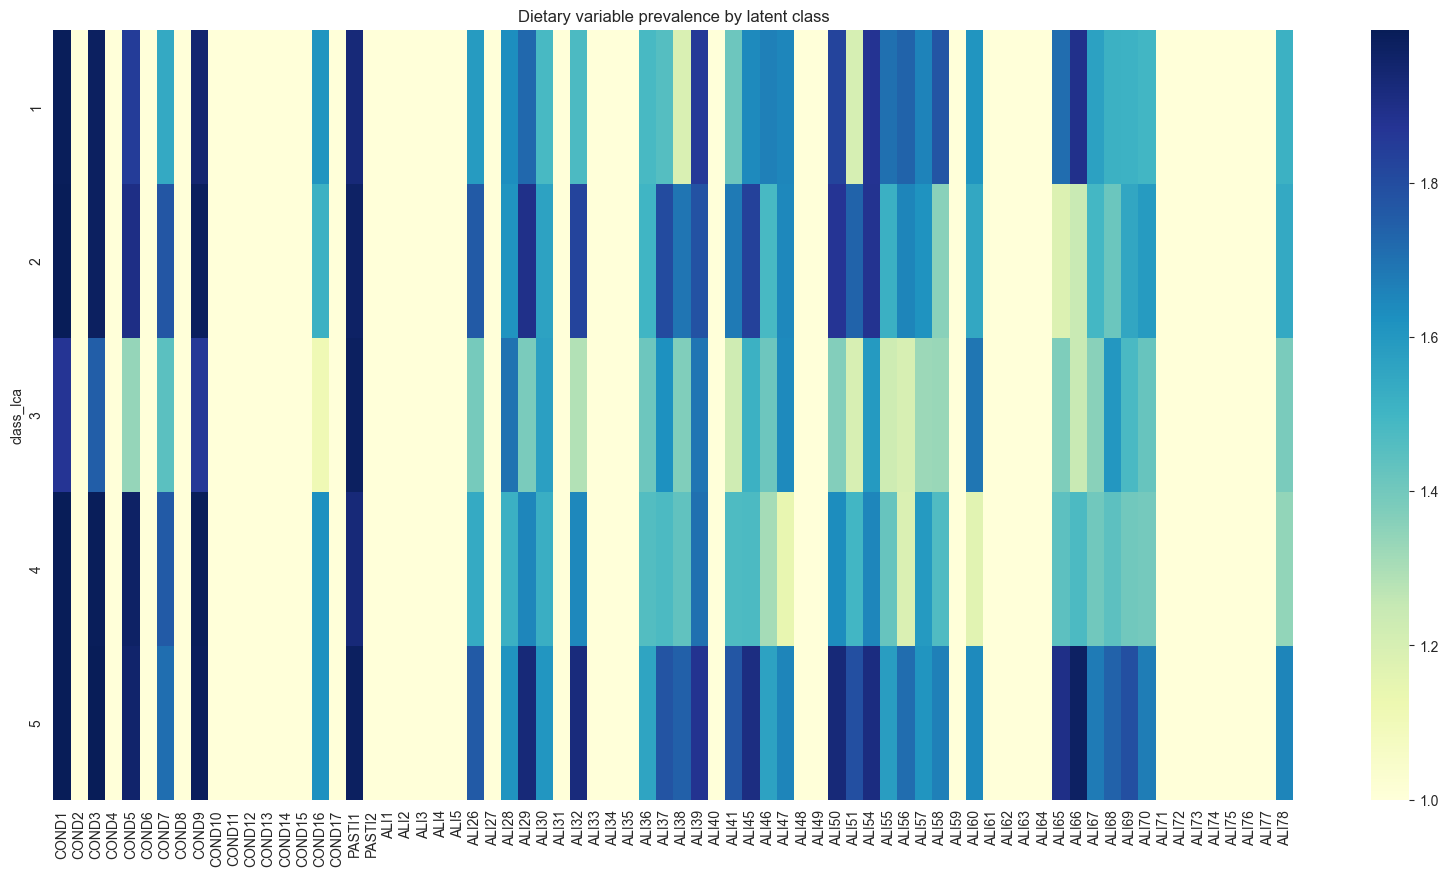

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encoding delle variabili dietetiche (di nuovo) per fare una media per classe
onehot_data = pd.get_dummies(classes_data[diet_vars])
onehot_data['class_lca'] = classes_data['class_lca']
mean_profiles = onehot_data.groupby('class_lca').mean()

plt.figure(figsize=(20, 10))
sns.heatmap(mean_profiles, cmap='YlGnBu')
plt.title("Dietary variable prevalence by latent class")
plt.show()

# Dietary Pattern Interpretation – LCA (5-Class Solution)

## Class 1: Clean & Classic Eaters

These individuals follow a generally conservative diet with **low to moderate** intake across most food items. They limit processed foods and added condiments and show consistent avoidance of excess seasoning and fats.

**Key Features:**

| Variable Group         | Pattern                                   |
|------------------------|--------------------------------------------|
| Fats (COND1–COND17)    | Mostly low use of condiments and fats     |
| Vegetables (ALI45–ALI57) | Low to moderate intake                   |
| Sweets & Snacks (ALI70–ALI78) | Low consumption                     |
| Fruits (ALI58–ALI69)   | Sparse to moderate intake                 |


## Class 2: Modern Mediterranean

A pattern that mirrors elements of a Mediterranean diet: **moderate use of olive oil**, high vegetable diversity, reasonable sweets consumption, and moderate fruit intake. Less processed meats.

**Key Features:**

| Variable Group         | Pattern                                       |
|------------------------|------------------------------------------------|
| Fats                   | Preference for olive oil, moderate condiments |
| Vegetables             | High and diverse intake                       |
| Fruits                 | Broad consumption of fresh options            |
| Sweets                 | Present but not excessive                     |


## Class 3: Protein-Packed & Processed

This group shows **high consumption of meats and processed protein sources**, especially salami, ham, and cheese. There's a lower intake of fresh vegetables and fruits.

**Key Features:**

| Variable Group         | Pattern                                      |
|------------------------|-----------------------------------------------|
| Meats (ALI26–ALI38)    | High intake of both red & processed meat     |
| Cheese (ALI42–ALI44)   | Frequent consumption                         |
| Vegetables/Fruits      | Lower levels                                 |


## Class 4: Veggie-Heavy with Sweet Touch

These individuals consume **lots of vegetables**, especially cooked ones, and **moderate to high intake of sweets and soft drinks**. Fruits are also more frequent, suggesting a balanced but indulgent diet.

**Key Features:**

| Variable Group         | Pattern                                       |
|------------------------|------------------------------------------------|
| Vegetables             | High intake, especially cooked               |
| Sweets & Beverages     | High frequency (cakes, pastries, sodas)     |
| Fruits                 | Moderate to high                             |


## Class 5: High-Frequency Snackers

This group is characterized by **frequent snacking**, with high values across many categories. They consume large portions of both healthy and indulgent items, suggesting a hypercaloric diet.

**Key Features:**

| Variable Group         | Pattern                                        |
|------------------------|-------------------------------------------------|
| Snacks/Sweets          | High intake across most sweet categories       |
| All food groups        | Many variables near the upper end of scale     |
| Frequency (PASTI)      | Higher number of eating occasions/snacks       |

# Regressione

In [97]:
regression_data = pd.concat([
    data['V2'],
    confounders_data,
    classes_data['class_lca']
], axis=1)
regression_data

,V2,V8,V11,V12,V13,V17,FUM2,ANTR9,ALI9,ALI22,...,FAM3_3,FAM8_0,FAM11_1735,FAM16_2019,GIN6_1,GIN19_8,V23_1,V23_4,ALC_TOTAL,class_lca
0,1,57,2,5.0,5.0,491.0,0.0,52,54.0,NaN,...,True,False,False,False,True,False,False,False,1010.0,5
1,0,70,2,3.0,3.0,392.0,0.0,66,14.0,0.0,...,False,True,False,False,True,False,False,False,7.0,1
2,1,61,1,6.0,6.0,391.0,0.0,48,42.0,NaN,...,False,True,False,False,False,False,False,False,21.0,1
3,0,48,2,4.0,5.0,492.0,0.0,47,88.0,0.0,...,False,True,False,False,False,False,False,False,16.0,5
4,1,51,2,10.0,13.0,891.0,0.0,50,40.0,1.0,...,False,True,False,False,False,False,False,False,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0,74,3,5.0,5.0,294.0,0.0,73,14.0,0.0,...,False,False,False,False,True,False,False,False,7.0,4
5153,0,69,5,7.0,7.0,194.0,0.0,69,80.0,1.0,...,False,False,False,False,True,False,False,False,1005.0,5
5154,0,70,1,5.0,NaN,294.0,NaN,30,7.0,0.0,...,False,True,False,False,True,False,False,False,7.0,4
5155,0,71,2,7.0,5.0,194.0,0.0,52,0.0,0.0,...,False,True,False,False,True,False,False,False,7.0,1


In [98]:
regression_data.isna().sum()

V2             0
V8             0
V11            0
V12           37
V13          125
            ... 
GIN19_8        0
V23_1          0
V23_4          0
ALC_TOTAL      0
class_lca      0
Length: 67, dtype: int64

In [99]:
regression_data = regression_data.dropna()

In [100]:
regression_data.isna().sum()

V2           0
V8           0
V11          0
V12          0
V13          0
            ..
GIN19_8      0
V23_1        0
V23_4        0
ALC_TOTAL    0
class_lca    0
Length: 67, dtype: int64

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Assumi che `data` contenga tutte le colonne: 'case', 'classes_lca', e i confounders
# Prepara X e y
X = regression_data.drop(columns= ['V2'])
y = regression_data['V2']

# Identifica le variabili categoriche (qui solo 'classes_lca')
categorical_features = ['class_lca']
continuous_features = ['V8', 'V11', 'V12', 'V13', 'V17', 'FUM2', 'ANTR9', 'ALI9', 'ALI22',
       'MESI54', 'PORP4', 'CODREG1', 'MESI66', 'ALC4', 'ALC7', 'ALC15',
       'ANAM13', 'FAM2', 'GIN2', 'NUT29', 'ALC_TOTAL']
# Pipeline di preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
     ('cont', StandardScaler(), continuous_features)
    ],
    remainder='passthrough'  )

# Pipeline finale con modello
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit del modello
pipeline.fit(X_train, y_train)

# Predizione
y_pred = pipeline.predict(X_test)

# Valutazione
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[455  42]
 [  7 454]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       497
           1       0.92      0.98      0.95       461

    accuracy                           0.95       958
   macro avg       0.95      0.95      0.95       958
weighted avg       0.95      0.95      0.95       958



In [96]:
confounders_data.columns

Index(['V8', 'V11', 'V12', 'V13', 'V17', 'FUM2', 'ANTR9', 'ALI9', 'ALI22',
       'MESI54', 'PORP4', 'CODREG1', 'MESI66', 'ALC4', 'ALC7', 'ALC15',
       'ANAM13', 'FAM2', 'GIN2', 'NUT29', 'CENTRO_2', 'CENTRO_4', 'CENTRO_5',
       'V5_1', 'V5_2', 'V5_3', 'V5_4', 'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9',
       'V5_10', 'V5_11', 'V5_12', 'V5_13', 'V5_15', 'FIS1_3', 'FIS2_1',
       'FIS3_2', 'FIS3_5', 'FIS5_5', 'FIS6_3', 'FIS7_0', 'ANTR13_0',
       'ANTR13_2', 'ANTR13_3', 'ANTR13_9', 'PORZ22_2', 'PORIAS2_1', 'PORZ29_1',
       'PORZ32_1', 'PORZ41_3', 'PORZ49_1', 'PORZ56_2', 'ALC2_9', 'FAM3_3',
       'FAM8_0', 'FAM11_1735', 'FAM16_2019', 'GIN6_1', 'GIN19_8', 'V23_1',
       'V23_4', 'ALC_TOTAL'],
      dtype='object')

In [113]:
categorical_features = ['CENTRO_2', 'CENTRO_4', 'CENTRO_5',
       'V5_1', 'V5_2', 'V5_3', 'V5_4', 'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9',
       'V5_10', 'V5_11', 'V5_12', 'V5_13', 'V5_15', 'FIS1_3', 'FIS2_1',
       'FIS3_2', 'FIS3_5', 'FIS5_5', 'FIS6_3', 'FIS7_0', 'ANTR13_0',
       'ANTR13_2', 'ANTR13_3', 'ANTR13_9', 'PORZ22_2', 'PORIAS2_1', 'PORZ29_1',
       'PORZ32_1', 'PORZ41_3', 'PORZ49_1', 'PORZ56_2', 'ALC2_9', 'FAM3_3',
       'FAM8_0', 'FAM11_1735', 'FAM16_2019', 'GIN6_1', 'GIN19_8', 'V23_1',
       'V23_4', 'class_LCA']
print(categorical_features)

['CENTRO_2', 'CENTRO_4', 'CENTRO_5', 'V5_1', 'V5_2', 'V5_3', 'V5_4', 'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9', 'V5_10', 'V5_11', 'V5_12', 'V5_13', 'V5_15', 'FIS1_3', 'FIS2_1', 'FIS3_2', 'FIS3_5', 'FIS5_5', 'FIS6_3', 'FIS7_0', 'ANTR13_0', 'ANTR13_2', 'ANTR13_3', 'ANTR13_9', 'PORZ22_2', 'PORIAS2_1', 'PORZ29_1', 'PORZ32_1', 'PORZ41_3', 'PORZ49_1', 'PORZ56_2', 'ALC2_9', 'FAM3_3', 'FAM8_0', 'FAM11_1735', 'FAM16_2019', 'GIN6_1', 'GIN19_8', 'V23_1', 'V23_4', 'class_LCA']


In [115]:
import numpy as np
import pandas as pd

# Estrai il modello e il preprocessor
model = pipeline.named_steps['classifier']
preprocessor = pipeline.named_steps['preprocessing']

# Ottieni nomi delle feature dopo il preprocessing
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
all_features = np.concatenate([cat_features, continuous_features])

# Ottieni i coefficienti del modello
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

In [117]:

# Crea tabella OR
odds_ratio_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)



ValueError: All arrays must be of the same length

In [119]:
passthrough_features = ['CENTRO_2', 'CENTRO_4', 'CENTRO_5',
       'V5_1', 'V5_2', 'V5_3', 'V5_4', 'V5_5', 'V5_6', 'V5_7', 'V5_8', 'V5_9',
       'V5_10', 'V5_11', 'V5_12', 'V5_13', 'V5_15', 'FIS1_3', 'FIS2_1',
       'FIS3_2', 'FIS3_5', 'FIS5_5', 'FIS6_3', 'FIS7_0', 'ANTR13_0',
       'ANTR13_2', 'ANTR13_3', 'ANTR13_9', 'PORZ22_2', 'PORIAS2_1', 'PORZ29_1',
       'PORZ32_1', 'PORZ41_3', 'PORZ49_1', 'PORZ56_2', 'ALC2_9', 'FAM3_3',
       'FAM8_0', 'FAM11_1735', 'FAM16_2019', 'GIN6_1', 'GIN19_8', 'V23_1',
       'V23_4']

In [ ]:
import numpy as np
import pandas as pd

# 1. Estrai il modello e il preprocessor
model = pipeline.named_steps['classifier']
preprocessor = pipeline.named_steps['preprocessing']

# 2. Ottieni i nomi delle feature one-hot encoded (solo per class_lca)
ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# 3. Crea la lista completa delle feature nel modello
all_features = np.concatenate([
    ohe_features,                # Le dummy per class_lca
    continuous_features,         # Le variabili continue
    passthrough_features         # Le variabili già one-hot encoded (come CENTRO_2 ecc.)
])

# 4. Estrai i coefficienti dal modello
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

# 5. Costruisci un DataFrame dei risultati
or_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

# 6. Ordina per importanza
or_df = or_df.sort_values(by='Odds Ratio', ascending=False)

In [123]:
or_df

,Feature,Coefficient,Odds Ratio
37,V5_10,6.284561,536.228696
40,V5_13,5.599917,270.404082
36,V5_9,3.879941,48.421370
28,V5_1,3.795291,44.491165
30,V5_3,2.417549,11.218329
...,...,...,...
33,V5_6,-2.486537,0.083198
32,V5_5,-2.628745,0.072169
34,V5_7,-4.755778,0.008602
39,V5_12,-4.949429,0.007087


In [124]:
# Filtra solo le feature legate a class_lca
class_lca_odds = or_df[or_df['Feature'].str.startswith('class_lca_')]

# Ordina per odds ratio decrescente (opzionale)
class_lca_odds = class_lca_odds.sort_values(by='Odds Ratio', ascending=False)

# Visualizza
print(class_lca_odds)

       Feature  Coefficient  Odds Ratio
0  class_lca_2     0.138574    1.148634
3  class_lca_5     0.019042    1.019224
1  class_lca_3    -0.002264    0.997738
2  class_lca_4    -0.351142    0.703884


### Interpretation of Latent Classes and Risk Association

The logistic regression model estimated the odds of being a case across different latent dietary classes, using **Class 1 as the reference group**. Below is the interpretation of each class:

- **Class 2** (`OR ≈ 1.15`)
  Individuals in this dietary class had **slightly higher odds** of being cases compared to Class 1. This suggests a **modest increase in risk**, although the effect size is relatively small.

- **Class 3** (`OR ≈ 1.00`)
  The odds of being a case in Class 3 are **essentially the same as Class 1**. No meaningful difference in risk is observed.

- **Class 4** (`OR ≈ 0.70`)
  Participants in Class 4 showed **lower odds** of being cases compared to Class 1. This suggests a **potential protective effect** associated with the dietary behaviors characterizing Class 4.

- **Class 5** (`OR ≈ 1.02`)
  Individuals in this group had **nearly identical odds** of being cases as those in Class 1. No substantial association with case status is evident.

## 🧠 Statistical Association of Dietary Patterns with Case Status

Using logistic regression, we assessed how each latent dietary class (derived from LCA) was associated with the odds of being a case. Below is the summary of statistical associations, matched with dietary interpretations:

---

### **Class 1 – Clean & Classic Eaters**
**Reference Group (OR = 1)**

- This group serves as the baseline. Individuals here consume a conservative diet with low intake of processed and indulgent foods.
- **Interpretation**: Represents a stable, moderate-risk dietary profile. No increased or decreased risk detected by design.

---

### **Class 2 – Modern Mediterranean**
**Odds Ratio: 1.15**

- Shows **slightly elevated odds** of being a case compared to Class 1.
- Although this class mirrors a healthy Mediterranean diet, the moderate presence of sweets and condiments might dilute the protective effect.
- **Conclusion**: Nutritionally balanced but not strongly protective.

---

### **Class 3 – Protein-Packed & Processed**
**Odds Ratio: 1.00**

- Odds of being a case are almost **identical** to Class 1.
- Despite higher intake of red and processed meats, the overall impact might be counterbalanced by other factors or noise.
- **Conclusion**: Possibly risk-neutral, but the profile should be interpreted cautiously due to potential confounding.

---

### **Class 4 – Veggie-Heavy with Sweet Touch**
**Odds Ratio: 0.70**

- Individuals in this class show a **30% reduced odds** of being a case.
- High intake of vegetables and fruits likely contributes to this protective association, despite the presence of sweets and beverages.
- **Conclusion**: This is the **most protective pattern**, suggesting that high plant-based intake may outweigh moderate indulgence.

---

### **Class 5 – High-Frequency Snackers**
**Odds Ratio: 1.02**

- Odds of being a case are **nearly equal** to the reference.
- Although this class consumes high amounts across all food types (both healthy and unhealthy), the net risk appears neutral.
- **Conclusion**: A highly variable diet with no clear association to case status.

---

### 🔍 Summary

- **Protective**: Class 4 (Veggie-Heavy)
- **Neutral**: Class 1 (reference), Class 3, Class 5
- **Slightly Risk-Increasing**: Class 2 (Modern Mediterranean)

These insights may guide future analyses or interventions targeting specific dietary behaviors linked to reduced disease risk.